# Regression Task

Regression is a machine learning algorithm used to find the linear relationship between a single dependent variable and multiple independednt variables. It is used to create a model to predict the value for a target variable based on multiple independent variables often known as predictors.

The  equation of best fit line for multiple linear regression is given by the following mathematical expression <br>
                                <b> &emsp;y = b1x1 + b2x2 + … + bnxn + c.<br> </b>
                                 &emsp;where x1,x2 represent independent variables and y the dependent variables and b the bias terms.

  

## Implementation of Regression 

Below is the implementation of the multiple linear regression on a dataset used to predict the medical charges based on the patients' age , sex , children , region and charges.The follwoing regression model has been created with the use of the optimization algorithm gradient descent with the learning rate of 0.0001 over 10000 iterations.

In [2]:
#Necessary modules 
import pandas as pd
import numpy as np

In [3]:
#Loading the dataset 
data = pd.read_csv('MedicalInsurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
#Encoding the categorical data columns to nominal data
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df = data
df.age= le.fit_transform(df.age)
df.sex=le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)
df.region = le.fit_transform(df.region)
#testing the encoded columns
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [5]:
#Defining independent and dependent variables.
dataSet = df[['age','sex','bmi' ,'children','smoker','region','charges']]
X= dataSet.iloc[: , :6]
Y = dataSet.iloc[: , 6]

#testing
print(X.head())
print(Y.head())

   age  sex     bmi  children  smoker  region
0    1    0  27.900         0       1       3
1    0    1  33.770         1       0       2
2   10    1  33.000         3       0       2
3   15    1  22.705         0       0       1
4   14    1  28.880         0       0       1
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [6]:
#Preprocessing of the independent variables 
n = len(X.columns)
for i in range (0,n+1):
    X.iloc[:, :i]= X.iloc[:, :i]/np.max(X.iloc[:, :i]) 
    
#checking the normalized values
print(X.head())

        age  sex       bmi  children  smoker    region
0  0.021739  0.0  0.525127       0.0     1.0  1.000000
1  0.000000  1.0  0.635611       0.2     0.0  0.666667
2  0.217391  1.0  0.621118       0.6     0.0  0.666667
3  0.326087  1.0  0.427348       0.0     0.0  0.333333
4  0.304348  1.0  0.543572       0.0     0.0  0.333333


In [7]:
#Adding a column for bias term
dataSet = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)

In [8]:
#Initializing the theta variables
theta = np.array([0]*n)

In [9]:
#A function to calculate the value theta*X
def hypothesis(theta,X):
    return theta*X

The below function evaluates accuracy of the model by calculating the Root Mean Square Errors <b>(RMSE)</b> between the actual and predicted values.RMSE has been used over MSE for evaluation as the dataset doesnot contain outliers. 

In [10]:
m = len(dataSet)
#Function for computing cost function  
def ComputeCost(X,y,theta):
    y1= hypothesis(theta,X)
    y1=np.sum(y1,axis=1)
    add= (np.sum(y1-y)**2/(2*m)) 
    return np.sqrt(add) #RMSE

In [11]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, n):
            theta[c] = theta[c] - alpha*(sum((y1-y)*(X.iloc[:,c])/n))
        j = ComputeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [12]:
J,j,theta = gradientDescent(X, Y,theta,0.0001,10000)

In [13]:
#calculating the predicted values
y_pred = hypothesis(theta, X)
y_pred= np.sum(y_pred, axis=1)

In [14]:
#checking the accuracy of the predidctive model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression().fit(X,Y)
print(model.score(X,Y))

0.7507372027994937


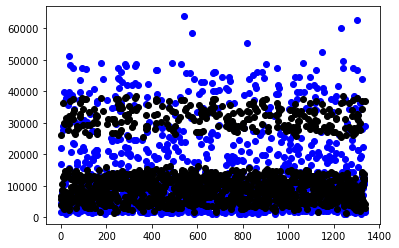

In [15]:
#plotting the scatter plot for actual and predicted value of y
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,m)),y= Y,color='blue')    
plt.scatter(x=list(range(0,m)), y=y_pred, color='black')
plt.show()

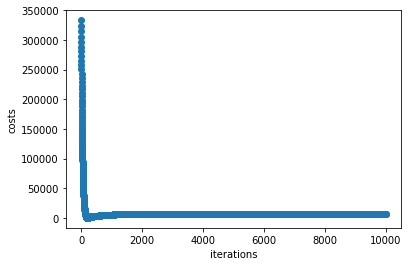

In [16]:
#Plottng the graph for iterated cost functions.
plt.figure()
plt.scatter(x=list(range(0,10000)), y=J)
plt.ylabel('costs')
plt.xlabel('iterations')
plt.show()

From the above graph we can comprehend that the residul errors between the actual and predicted value seem to undergo a uniform variation after reaching a certain iteration.